In [24]:
from glob import glob
import numpy as np
import matplotlib.pyplot as plt

from scipy import ndimage
from scipy import misc
import imageio
import imageio.v2 as imageio

## 图像读写

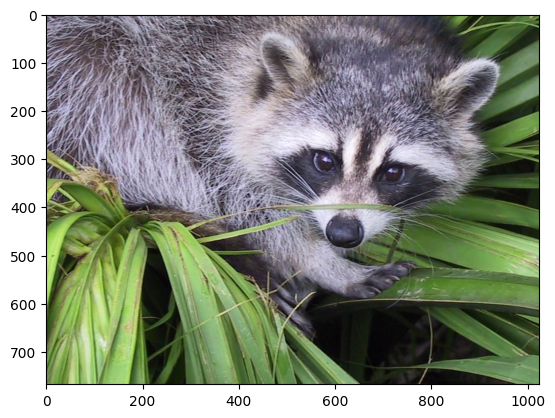

<class 'imageio.core.util.Array'>
(768, 1024, 3)
uint8


In [16]:
face = misc.face()

# 保存一个 array 为 png 文件
imageio.imsave("face.png", face)

# 读取图像
face = imageio.imread("face.png")

# 展示图像
plt.imshow(face)
plt.show()

# 图像数据属性
print(type(face))
print(face.shape)
print(face.dtype)

In [22]:
# 创建 raw 文件
face.tofile("face.raw")
face_from_raw = np.fromfile("face.raw", dtype = np.uint8)
print(face_from_raw.shape)
face_from_raw.shape = (768, 1024, 3)

(2359296,)


In [23]:
# 处理大数据集
face_memmap = np.memmap(
    "face.raw",
    dtype = np.uint8,
    shape = (768, 1024, 3),
)
print(face_from_raw.shape)

(768, 1024, 3)


In [27]:
for i in range(10):
    im = np.random.randint(0, 256, 10000).reshape((100, 100))
    imageio.imsave("random_%02d.png" % i, im)

filelist = glob("random*.png")
filelist.sort()
filelist

Lossy conversion from int64 to uint8. Range [0, 255]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 255]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 255]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 255]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 255]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 255]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 255]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 255]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 

['random_00.png',
 'random_01.png',
 'random_02.png',
 'random_03.png',
 'random_04.png',
 'random_05.png',
 'random_06.png',
 'random_07.png',
 'random_08.png',
 'random_09.png']

## 图像展示

In [37]:
face = misc.face(gray = True)

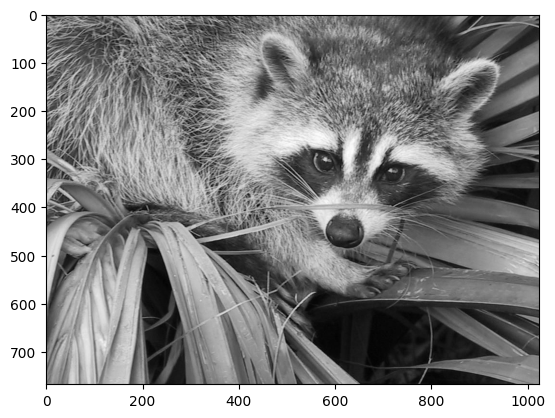

In [38]:
# 图像展示-灰度图像
plt.imshow(face, cmap = plt.cm.gray)
plt.show()

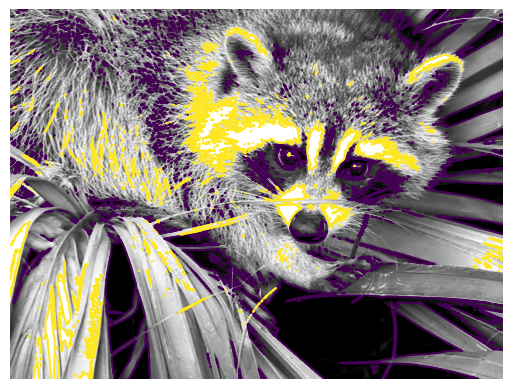

In [32]:
# 图像展示-增加对比对
plt.imshow(face, cmap = plt.cm.gray, vmin = 30, vmax = 200)
plt.axis("off")  # 去除坐标轴和标签
plt.contour(face, [50, 200])  # 绘制轮廓线
plt.show()

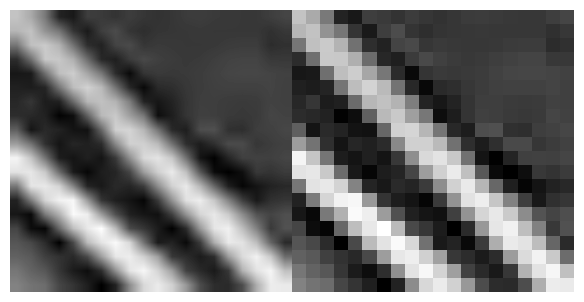

In [45]:
# 强度变化插值
plt.figure(figsize = (6, 3))
plt.subplot(121)
plt.imshow(face[320:340, 510:530], cmap = plt.cm.gray, interpolation = "bilinear")
plt.axis("off")
plt.subplot(122)
plt.imshow(face[320:340, 510:530], cmap = plt.cm.gray, interpolation = "nearest")
plt.axis("off")
plt.subplots_adjust(wspace = 0.0, hspace = 0.0, top = 0.99, bottom = 0.01, left = 0.05, right = 0.99)
plt.show()

## 基本操作

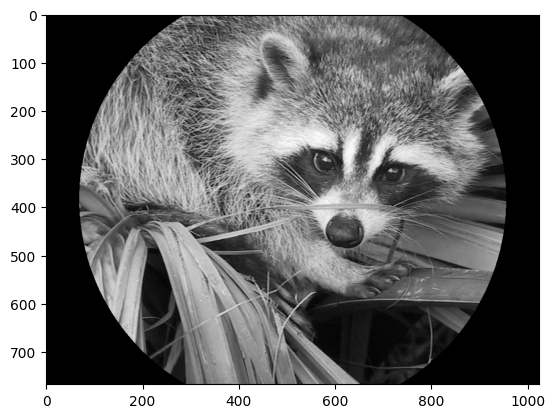

In [48]:
face = misc.face(gray = True)

# masks
lx, ly = face.shape
X, Y = np.ogrid[0:lx, 0:ly]
mask = (X - lx / 2) ** 2 + (Y - ly / 2) ** 2 > lx * ly / 4
face[mask] = 0
plt.imshow(face, cmap = plt.cm.gray)
plt.show()

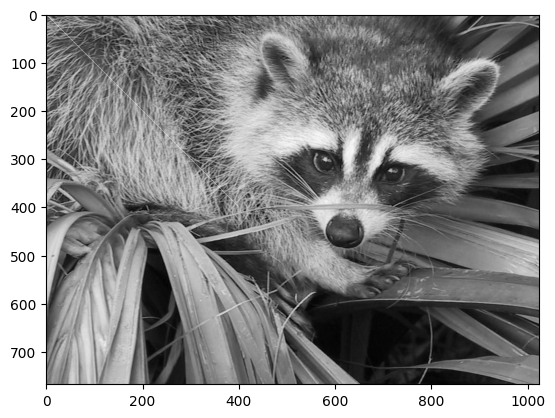

In [51]:
face = misc.face(gray = True)

# Fancy indexing
face[range(400), range(400)] = 255
plt.imshow(face, cmap = plt.cm.gray)
plt.show()

### 统计信息

In [52]:
face = misc.face(gray = True)

face.mean(), face.max(), face.min()

(113.48026784261067, 250, 0)

### 几何变换

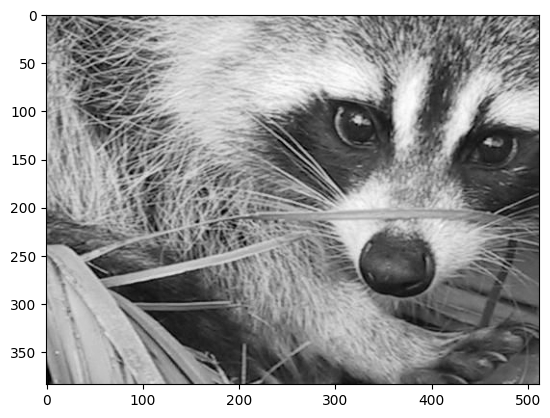

In [54]:
face = misc.face(gray = True)

# cropping
lx, ly = face.shape
crop_face = face[lx // 4:-lx // 4, ly // 4:-ly // 4]
plt.imshow(crop_face, cmap = plt.cm.gray)
plt.show()

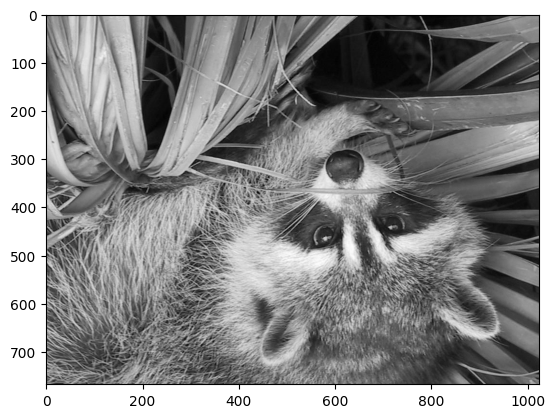

In [55]:
# up <-> down flip
flip_ud_face = np.flipud(face)
plt.imshow(flip_ud_face, cmap = plt.cm.gray)
plt.show()

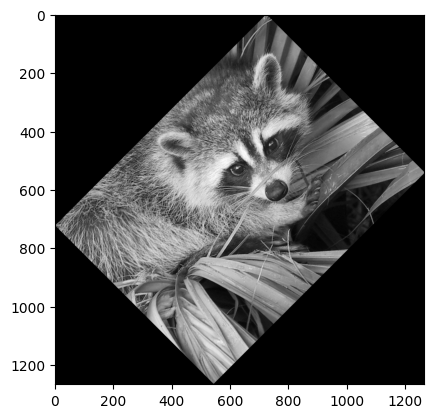

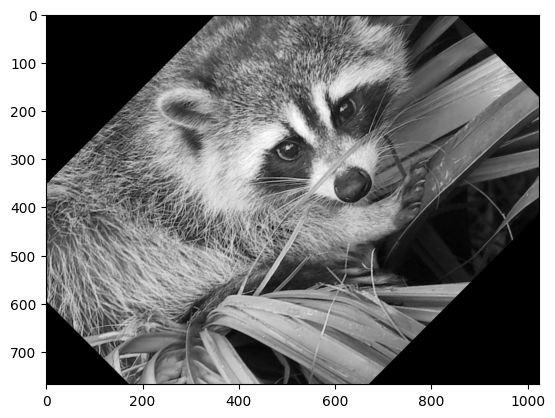

In [56]:
# rotation
rotate_face = ndimage.rotate(face, 45)
plt.imshow(rotate_face, cmap = plt.cm.gray)
plt.show()

rotate_face_noreshape = ndimage.rotate(face, 45, reshape = False)
plt.imshow(rotate_face_noreshape, cmap = plt.cm.gray)
plt.show()

## 图像去噪